In [1]:
import os
import datautil
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

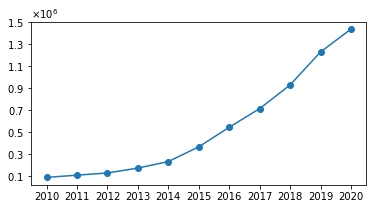

In [2]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(
    [i for i in range(2010, 2021)], 
    [86161, 106285, 126711, 170816, 230321, 364218, 542136, 711942, 927345, 1228004, 1435600], 
    marker="o")
ax.set_yticks([i * 10**5 for i in range(1, 16, 2)])
ax.set_xticks([i for i in range(2010, 2021)])
ax.ticklabel_format(axis="y", style="sci", useMathText=True, useOffset=False)
fig.savefig("plots/growth.pdf", bbox_inches="tight")

In [3]:
libraries = datautil.select_libraries_from_libraries_io()
dep_changes = datautil.select_dependency_changes_all()
added_projects = defaultdict(set)
for idx, chg in dep_changes[dep_changes["type"] == "add"].iterrows():
    added_projects[chg["lib2"]].add(chg["project"])
libraries["addedProjects"] = libraries["name"].map(lambda x: len(added_projects[x]))

ServerSelectionTimeoutError: mongo:27017: [Errno -3] Temporary failure in name resolution, Timeout: 30s, Topology Description: <TopologyDescription id: 60ac5f515a6787b6ef7f6a98, topology_type: Single, servers: [<ServerDescription ('mongo', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('mongo:27017: [Errno -3] Temporary failure in name resolution')>]>

In [ ]:
libraries["versionsCount"] = libraries["name"].map(lambda x: len(datautil.select_library_versions(x)))

In [ ]:
libraries[["dependentRepositoriesCount", "addedProjects", "versionsCount"]].describe()

In [ ]:
libraries[libraries.addedProjects > 10].describe()

In [ ]:
# libraries[libraries.addedProjects >= 10].sample(94).to_csv("sampled_libraries.csv", index=False)

In [ ]:
ylabels = ["Number of Libraries", "", ""]
xlabels = ["Number of Dependent Repositories (Libraries.io)", "Number of Projects that Used the Library in our Dataset", "Number of Versions"]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(data=libraries, x="dependentRepositoriesCount", binwidth=0.25, log_scale=True, ax=axes[0])
sns.histplot(data=libraries["addedProjects"] + 1, binwidth=0.25, log_scale=True, ax=axes[1])
sns.histplot(data=libraries["versionsCount"] + 1, binwidth=0.25, log_scale=True, ax=axes[2])
for i in range(0, 3):
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel(ylabels[i])
fig.savefig("plots/libraries.pdf", bbox_inches="tight")